### 4. Seaborn 패키지

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
iris = sns.load_dataset("iris")         # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")         # 팁 데이터
flights = sns.load_dataset("flights")   # 여객운송 데이터
mpg = sns.load_dataset('mpg')           # mile per gallon 데이터

- 1차원 분포

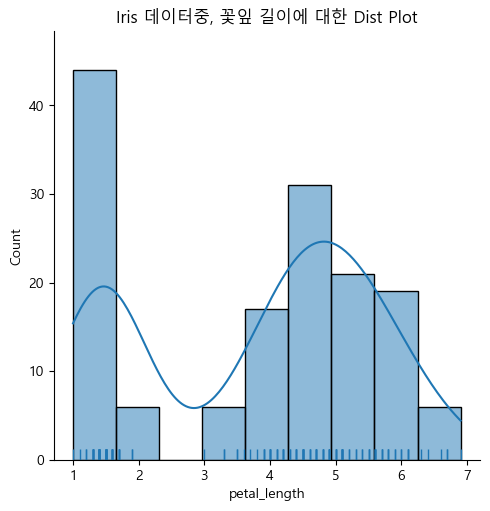

In [5]:
# displot(distribution plot)
x = iris.petal_length.values
sns.displot(x='petal_length',kde=True,rug=True,data=iris)
plt.title('Iris 데이터중, 꽃잎 길이에 대한 Dist Plot')
plt.show()

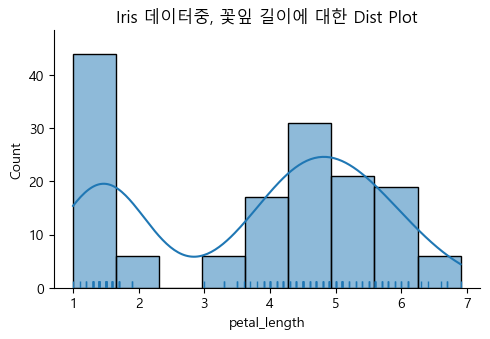

In [21]:
# displot(distribution plot)
fig = sns.displot(x='petal_length',kde=True,rug=True,data=iris)
fig.fig.set_size_inches(5,3)
plt.title('Iris 데이터중, 꽃잎 길이에 대한 Dist Plot')
plt.show()

- count plot

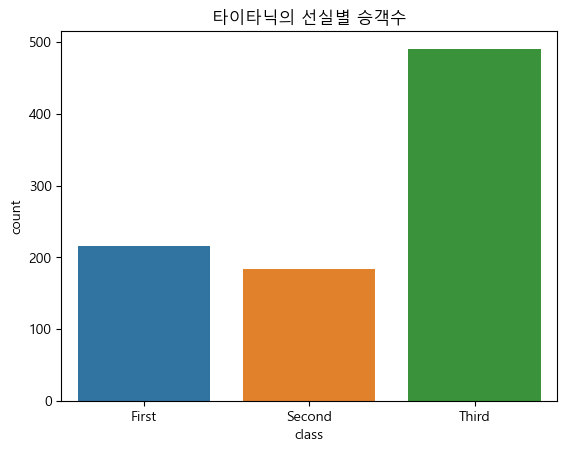

In [7]:
sns.countplot(x='class',data=titanic)
plt.title('타이타닉의 선실별 승객수')
plt.show()

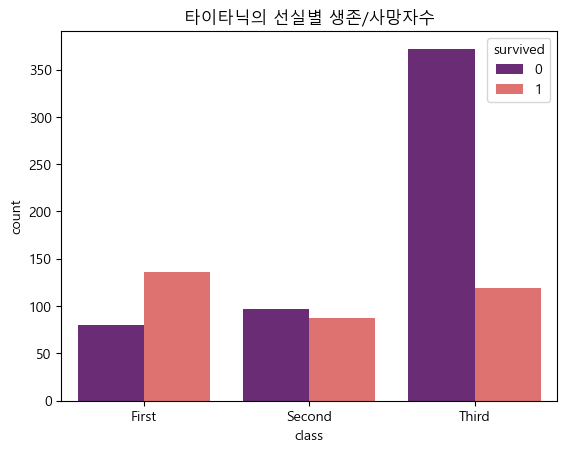

In [9]:
sns.countplot(x='class',hue='survived',data=titanic,palette='magma')
plt.title('타이타닉의 선실별 생존/사망자수')
plt.show()

- 다차원 실수 데이터

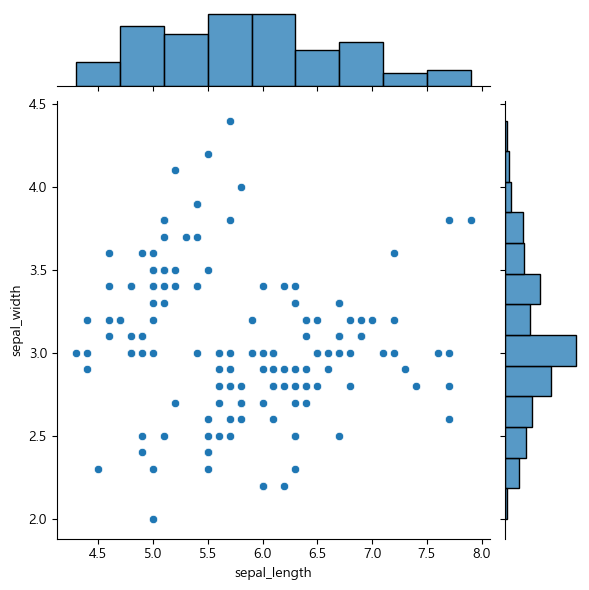

In [13]:
# jointplot
sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
# plt.title('iris 꽃받침 길이/너비의 joint plot')
plt.show()

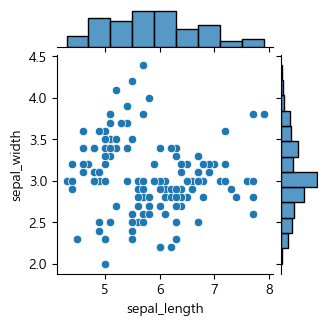

In [22]:
# jointplot
fig = sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
fig.fig.set_size_inches(3,3)
plt.show()

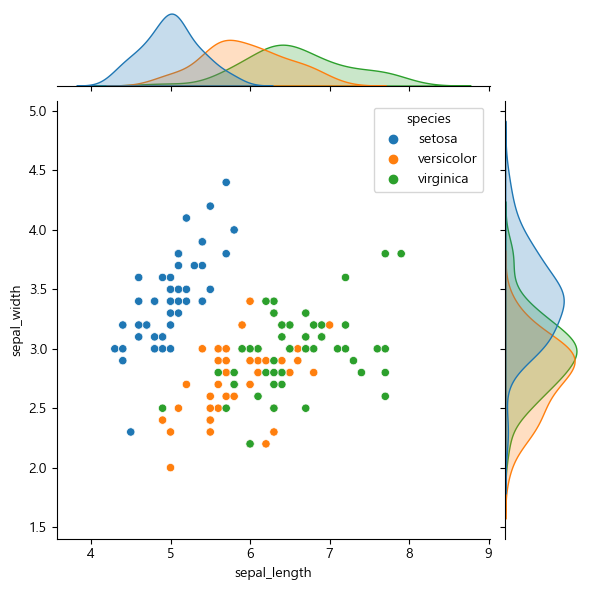

In [12]:
# jointplot
sns.jointplot(x='sepal_length',y='sepal_width',hue='species',data=iris)
# plt.title('iris 꽃받침 길이/너비의 joint plot')
plt.show()

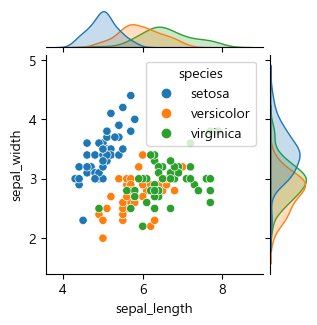

In [23]:
# jointplot
fig = sns.jointplot(x='sepal_length',y='sepal_width',hue='species',data=iris)
fig.fig.set_size_inches(3,3)
plt.show()

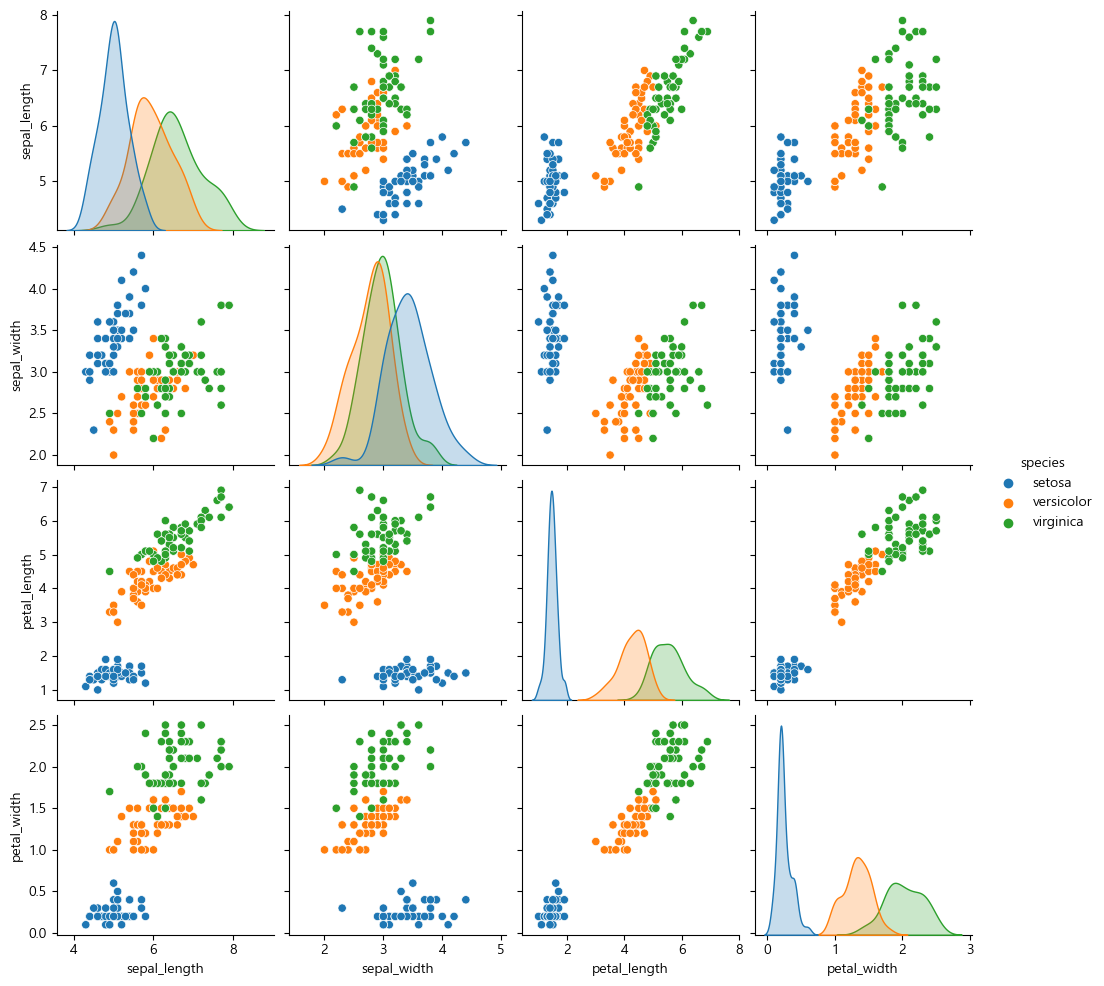

In [14]:
# pair plot
sns.pairplot(hue='species',data=iris);

- 다차원 카테고리 데이터

In [16]:
# heatmap
dt = titanic.pivot_table('survived','class','sex',aggfunc='count')
dt

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


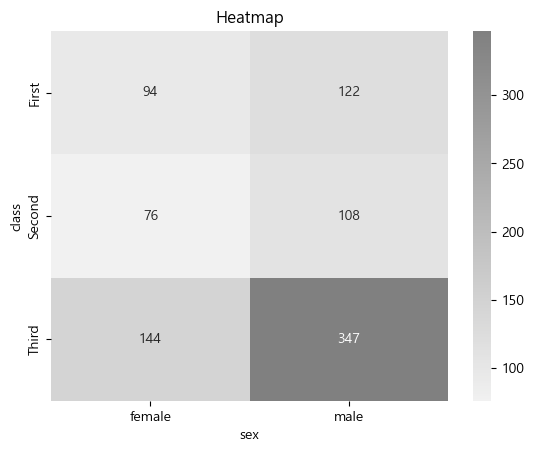

In [17]:
sns.heatmap(dt,cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

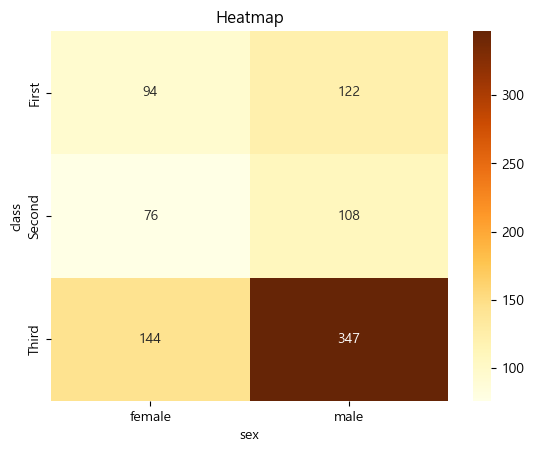

In [20]:
sns.heatmap(dt,cmap='YlOrBr', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

In [27]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


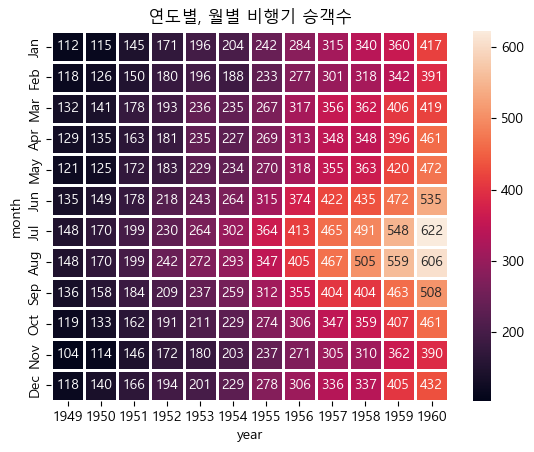

In [29]:
passengers = flights.pivot(index='month',columns='year',values='passengers')
sns.heatmap(passengers, annot=True, fmt='d',linewidths=1)
plt.title('연도별, 월별 비행기 승객수');

- 다차원 복합 데이터
    - bar plot

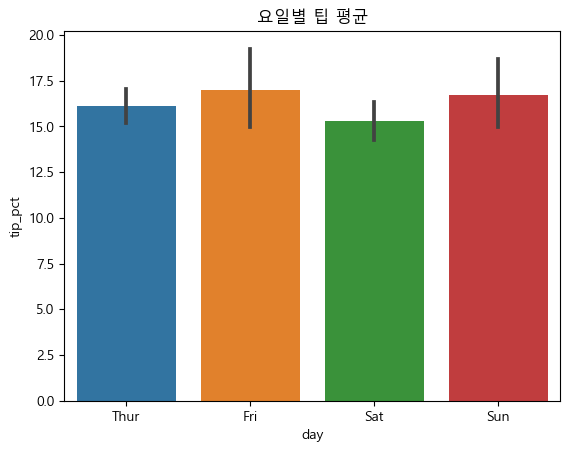

In [30]:
tips['tip_pct'] = (tips.tip/tips.total_bill * 100).round(2)
sns.barplot(x='day',y='tip_pct',data=tips)
plt.title('요일별 팁 평균');

In [32]:
print(mpg.shape)
mpg.tail()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [34]:
mpg['manufacturer'] = mpg.name.apply(lambda x:x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


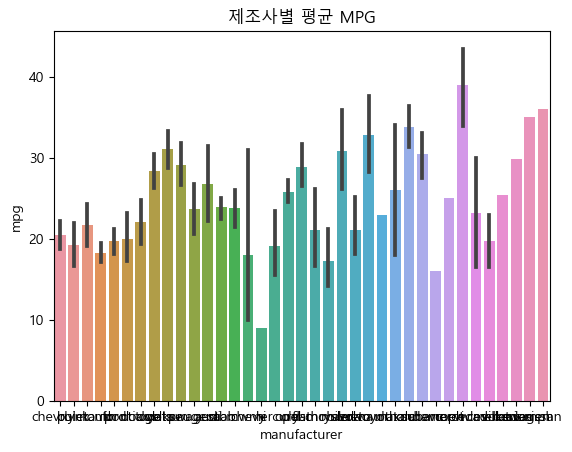

In [35]:
sns.barplot(x='manufacturer',y='mpg',data=mpg)
plt.title('제조사별 평균 MPG');

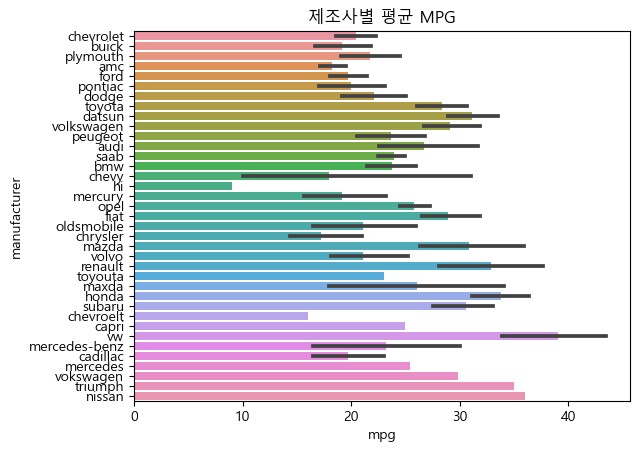

In [36]:
# x,y 를 바꿔주면 수평 막대그래프가 됨
sns.barplot(y='manufacturer',x='mpg',data=mpg)
plt.title('제조사별 평균 MPG');

- box plot

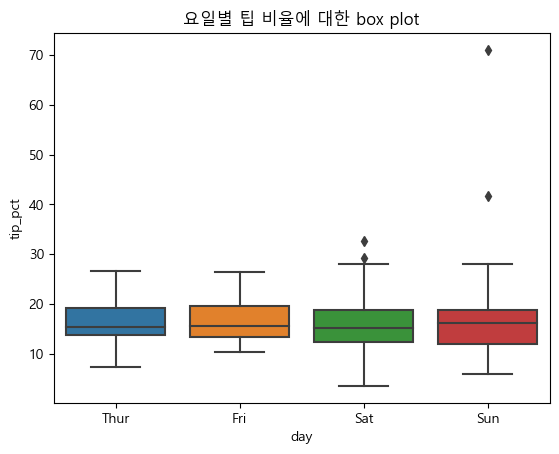

In [37]:
sns.boxplot(x='day',y='tip_pct',data=tips)
plt.title('요일별 팁 비율에 대한 box plot');

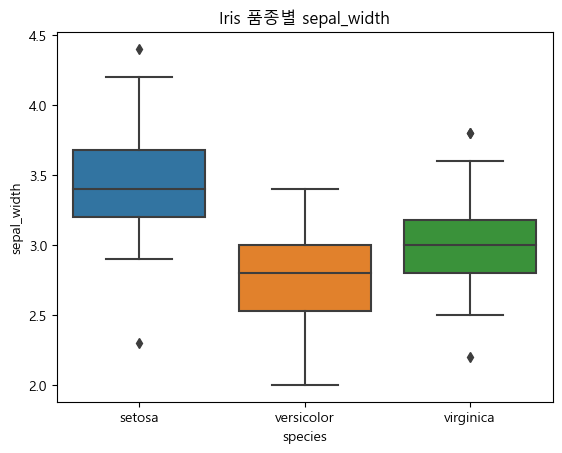

In [38]:
# iris
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title('Iris 품종별 sepal_width');

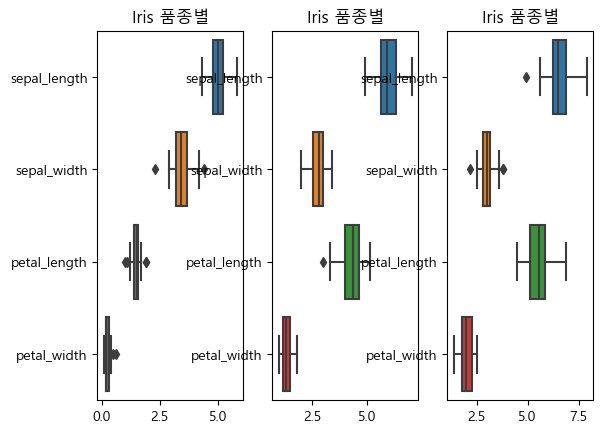

In [47]:
for i,species in enumerate(iris.species.unique()):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=iris[iris.species == species],orient='horizontal')
    plt.title('Iris 품종별')
plt.show()

- regplot

In [48]:
ans = sns.load_dataset('anscombe')

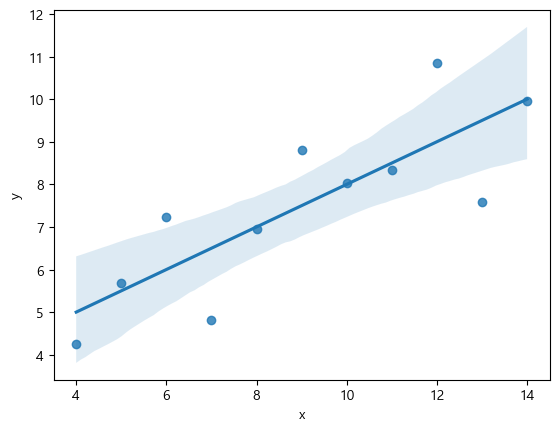

In [49]:
sns.regplot(x='x',y='y',data=ans[ans.dataset =='I']);

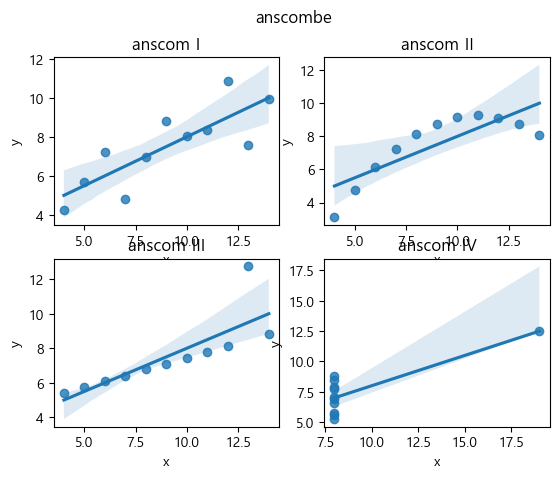

In [56]:
fig, axes = plt.subplots(2,2 )
for i, roman in enumerate(ans.dataset.unique()):
    ax = axes[i//2,i%2]
    sns.regplot(x='x',y='y',data=ans[ans.dataset == roman], ax=ax)
    ax.set_title(f'anscom {roman}')
fig.suptitle('anscombe')
plt.show()